# v1

In [ ]:
!gdown --id 1O8KKfW7HERIwbqR7Kwkf4wp_GiRy1ngF


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O8KKfW7HERIwbqR7Kwkf4wp_GiRy1ngF
From (redirected): https://drive.google.com/uc?id=1O8KKfW7HERIwbqR7Kwkf4wp_GiRy1ngF&confirm=t&uuid=992d14ed-b6d0-42b6-8730-ae44d84801be
To: /content/drugbank_all_full_database.xml (2).zip
100% 205M/205M [00:02<00:00, 68.8MB/s]


In [ ]:
!unzip '/content/drugbank_all_full_database.xml (2).zip'

Archive:  /content/drugbank_all_full_database.xml (2).zip
replace full database.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

# Define the namespace
ns = {'db': 'http://www.drugbank.ca'}

# Function to extract drug data
def extract_drug_data(drug, ns):
    return {
        'DrugBank ID': drug.find('db:drugbank-id', ns).text if drug.find('db:drugbank-id', ns) is not None else None,
        'Name': drug.find('db:name', ns).text if drug.find('db:name', ns) is not None else None,
        'Description': drug.find('db:description', ns).text if drug.find('db:description', ns) is not None else None,
        'CAS Number': drug.find('db:cas-number', ns).text if drug.find('db:cas-number', ns) is not None else None,
        'State': drug.find('db:state', ns).text if drug.find('db:state', ns) is not None else None,
        'SMILES': next((prop.find('db:value', ns).text for prop in drug.findall("db:calculated-properties/db:property", ns) if prop.find('db:kind', ns).text == 'SMILES'), None),
        'LogP': next((prop.find('db:value', ns).text for prop in drug.findall("db:calculated-properties/db:property", ns) if prop.find('db:kind', ns).text == 'logP'), None),
        'Molecular Weight': next((prop.find('db:value', ns).text for prop in drug.findall("db:calculated-properties/db:property", ns) if prop.find('db:kind', ns).text == 'Molecular Weight'), None),
        'Monoisotopic Mass': next((prop.find('db:value', ns).text for prop in drug.findall("db:calculated-properties/db:property", ns) if prop.find('db:kind', ns).text == 'Monoisotopic Weight'), None),
        'Pharmacodynamics': drug.find('db:pharmacodynamics', ns).text if drug.find('db:pharmacodynamics', ns) is not None else None,
        'Mechanism of Action': drug.find('db:mechanism-of-action', ns).text if drug.find('db:mechanism-of-action', ns) is not None else None,
        'Metabolism': drug.find('db:metabolism', ns).text if drug.find('db:metabolism', ns) is not None else None,
        'Absorption': drug.find('db:absorption', ns).text if drug.find('db:absorption', ns) is not None else None,
        'Protein Binding': drug.find('db:protein-binding', ns).text if drug.find('db:protein-binding', ns) is not None else None,
        'Classification': {
            'Kingdom': drug.find('db:classification/db:kingdom', ns).text if drug.find('db:classification/db:kingdom', ns) is not None else None,
            'Superclass': drug.find('db:classification/db:superclass', ns).text if drug.find('db:classification/db:superclass', ns) is not None else None,
            'Class': drug.find('db:classification/db:class', ns).text if drug.find('db:classification/db:class', ns) is not None else None,
            'Subclass': drug.find('db:classification/db:subclass', ns).text if drug.find('db:classification/db:subclass', ns) is not None else None,
        },
        'Affected Organisms': [ao.text for ao in drug.findall("db:affected-organisms/db:affected-organism", ns)],
        'Food Interactions': [fi.text for fi in drug.findall("db:food-interactions/db:food-interaction", ns)],
        'Drug Interactions': [{
            'Drug': di.find('db:drugbank-id', ns).text,
            'Description': di.find('db:description', ns).text
        } for di in drug.findall("db:drug-interactions/db:drug-interaction", ns)]
    }

# Load the XML file
xml_file = "full database.xml"  # Replace with your XML file path
tree = ET.parse(xml_file)
root = tree.getroot()

# Extract data for all drugs
drugs_data = []
for drug in root.findall('db:drug', ns):
    drugs_data.append(extract_drug_data(drug, ns))

# Convert to DataFrame
df = pd.DataFrame(drugs_data)

# Normalize nested dictionaries and lists
classification_df = pd.json_normalize(df['Classification'])
df = pd.concat([df.drop(columns=['Classification']), classification_df], axis=1)

# Save to CSV
output_file = "drugbank_data.csv"  # Replace with your desired CSV file name
df.to_csv(output_file, index=False)

print(f"Data extracted and saved to {output_file}")


Data extracted and saved to drugbank_data.csv


In [ ]:
df = pd.read_csv("/content/drugbank_data.csv")

In [ ]:
# Replace empty lists with NaN
df = df.applymap(lambda x: pd.NA if x == [] else x)
df = df.fillna('')

# Drop rows where all values are NaN
df = df.dropna(how='all')

# Drop columns where all values are NaN
df = df.dropna(axis=1, how='all')

# Optional: Reset the index after cleaning
df = df.reset_index(drop=True)

<ipython-input-11-58cda7bf775b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.NA if x == [] else x)


In [ ]:
import pandas as pd

# Replace empty strings and `<NA>` with `pd.NA`
df = df.replace(to_replace=['', '<NA>'], value=pd.NA)

# Handle empty lists explicitly
for col in df.columns:
    df[col] = df[col].apply(lambda x: pd.NA if isinstance(x, list) and len(x) == 0 else x)

# Drop rows where all columns are `NA`
df = df.dropna(how='all')

# Reset index for cleaner DataFrame
df = df.reset_index(drop=True)

print(df)


      DrugBank ID                 Name  \
0         DB00001            Lepirudin   
1         DB00002            Cetuximab   
2         DB00003         Dornase alfa   
3         DB00004  Denileukin diftitox   
4         DB00005           Etanercept   
...           ...                  ...   
17425     DB19452          Exidavnemab   
17426     DB19453  Imciromab pentetate   
17427     DB19454         Cetyl oleate   
17428     DB19455   Cetyl myristoleate   
17429     DB19456   Cetyl palmitoleate   

                                             Description    CAS Number  \
0      Lepirudin is a recombinant hirudin formed by 6...   138068-37-8   
1      Cetuximab is a recombinant chimeric human/mous...   205923-56-4   
2      Dornase alfa is a biosynthetic form of human d...   143831-71-4   
3      Denileukin diftitox is an IL2-receptor-directe...   173146-27-5   
4      Dimeric fusion protein consisting of the extra...   185243-69-0   
...                                                

In [ ]:
import pandas as pd

# Replace empty lists with NaN
#df = df.replace(to_replace=[[]], value=pd.NA)

# Drop rows where all values are NaN
df = df.dropna(how='all')

# Drop columns where all values are NaN
df = df.dropna(axis=1, how='all')

# Drop rows where specific columns are NaN
df = df.dropna(subset=['DrugBank ID', 'Name'])

# Optional: Reset the index after cleaning
df = df.reset_index(drop=True)


In [ ]:
# Drop rows where all values are NaN
df = df.dropna(how='all')

# Drop rows where any column has empty lists
df = df[~df.applymap(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)]

# Verify the result
print(df.head())


  DrugBank ID                 Name  \
0     DB00001            Lepirudin   
1     DB00002            Cetuximab   
2     DB00003         Dornase alfa   
3     DB00004  Denileukin diftitox   
4     DB00005           Etanercept   

                                         Description   CAS Number   State  \
0  Lepirudin is a recombinant hirudin formed by 6...  138068-37-8   solid   
1  Cetuximab is a recombinant chimeric human/mous...  205923-56-4  liquid   
2  Dornase alfa is a biosynthetic form of human d...  143831-71-4  liquid   
3  Denileukin diftitox is an IL2-receptor-directe...  173146-27-5  liquid   
4  Dimeric fusion protein consisting of the extra...  185243-69-0  liquid   

  SMILES  LogP Molecular Weight Monoisotopic Mass  \
0   <NA>  <NA>             <NA>              <NA>   
1   <NA>  <NA>             <NA>              <NA>   
2   <NA>  <NA>             <NA>              <NA>   
3   <NA>  <NA>             <NA>              <NA>   
4   <NA>  <NA>             <NA>            

<ipython-input-16-5b91ad321c98>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[~df.applymap(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)]


In [ ]:
import pandas as pd

# Replace the empty lists ([]) with NaN for easier handling
df = df.applymap(lambda x: pd.NA if isinstance(x, list) and len(x) == 0 else x)

# Drop rows where all columns are NaN
df = df.dropna(how='all')

# Drop rows where any column is NaN
df = df.dropna()

<ipython-input-18-050ffa2d7864>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.NA if isinstance(x, list) and len(x) == 0 else x)


In [ ]:
df

,DrugBank ID,Name,Description,CAS Number,State,SMILES,LogP,Molecular Weight,Monoisotopic Mass,Pharmacodynamics,...,Metabolism,Absorption,Protein Binding,Affected Organisms,Food Interactions,Drug Interactions,Kingdom,Superclass,Class,Subclass
13,DB00014,Goserelin,"Goserelin is a synthetic hormone. In men, it s...",65807-02-5,solid,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.3,1269.4105,1268.641439,The pharmacokinetics of goserelin have been de...,...,Hepatic,"Inactive orally, rapidly absorbed following su...",27.3%,['Humans and other mammals'],[],"[{'Drug': 'DB09066', 'Description': 'The thera...",Organic compounds,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"
84,DB00091,Cyclosporine,Cyclosporine is a calcineurin inhibitor known ...,59865-13-3,solid,CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C\C=C\C)N...,3.64,1202.635,1201.841368,Cyclosporine exerts potent immunosuppressive a...,...,Cyclosporine is metabolized in the intestine a...,The absorption of cyclosporine occurs mainly i...,About 50% of the administered dose is taken up...,['Humans and other mammals'],"['Avoid grapefruit products.', 'Avoid potassiu...","[{'Drug': 'DB00337', 'Description': 'The risk ...",Organic compounds,Organic acids and derivatives,Peptidomimetics,Peptoid-peptide hybrids
97,DB00106,Abarelix,Synthetic decapeptide antagonist to gonadotrop...,183552-38-7,solid,CC(C)C[C@H](NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,2.84,1416.09,1414.684072,Used in the palliative treatment of advanced p...,...,"<i>In vitro</i> hepatocyte (rat, monkey, human...","Following IM administration of 100 mg, abareli...",96-99%,['Humans and other mammals'],[],[],Organic compounds,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"
106,DB00115,Cyanocobalamin,Cyanocobalamin (commonly known as Vitamin B12)...,68-19-9,solid,C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N...,2.66,1355.3652,1354.567405,\r\n**General effects**\r\n\r\nCyanocobalamin ...,...,Vitamin B12 or cyanocobalamin obtained from fo...,Vitamin B12 is quickly absorbed from intramusc...,Very high (to specific plasma proteins called ...,['Humans and other mammals'],['Take with or without food. Recommendations v...,"[{'Drug': 'DB00446', 'Description': 'The thera...",Organic compounds,Organoheterocyclic compounds,Tetrapyrroles and derivatives,Corrinoids
116,DB00126,Ascorbic acid,A six carbon compound related to glucose. It i...,50-81-7,solid,[H][C@@]1(OC(=O)C(O)=C1O)[C@@H](O)CO,-1.6,176.1241,176.032088,Ascorbic Acid (vitamin C) is a water-soluble v...,...,Hepatic. Ascorbic acid is reversibly oxidised ...,70% to 90%,25%,['Humans and other mammals'],['Avoid multivalent ions. Do not infuse with e...,"[{'Drug': 'DB06723', 'Description': 'Ascorbic ...",Organic compounds,Organoheterocyclic compounds,Dihydrofurans,Furanones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13050,DB15011,Avacopan,Anti-neutrophil cytoplasmic (auto)antibody (AN...,1346623-17-3,solid,CC1=CC=C(NC(=O)[C@H]2CCCN([C@H]2C2=CC=C(NC3CCC...,6.82,581.656,581.26654,Avacopan is a complement 5a receptor (C5aR) an...,...,Avacopan is metabolized primarily by CYP3A4. T...,In AAV patients receiving 30 mg avacopan twice...,Avacopan and its M1 metabolite are more than 9...,['Humans and other mammals'],['Take with food.'],"[{'Drug': 'DB00252', 'Description': 'The metab...",Organic compounds,Benzenoids,Benzene and substituted derivatives,Benzoyl derivatives
13074,DB15035,Zanubrutinib,Zanubrutinib is a novel Bruton's tyrosine kina...,1691249-45-2,solid,NC(=O)C1=C2NCC[C@@H](C3CCN(CC3)C(=O)C=C)N2N=C1...,3.27,471.561,471.22704,Zanubrutinib is an immunomodulating agent that...,...,Zanubrutinib is predominantly metabolized by C...,Following oral administration of zanubrutinib ...,The plasma protein binding of zanubrutinib is ...,['Humans and other mammals'],['Avoid grapefruit products. Grapefruit inhibi...,"[{'Drug': 'DB06413', 'Description

In [ ]:
# Replace empty lists ([]) with NaN
df = df.applymap(lambda x: pd.NA if isinstance(x, list) and len(x) == 0 else x)

# Drop rows where all columns are NaN
df = df.dropna(how='all')

# Replace NaN in specific columns or rows where [] values were found
columns_to_clean = df.columns  # If specific columns need cleaning, replace with column names
df[columns_to_clean] = df[columns_to_clean].applymap(lambda x: pd.NA if x == '[]' else x)

# Drop rows where any column is NaN
df = df.dropna()

<ipython-input-20-cf99051a5056>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.NA if isinstance(x, list) and len(x) == 0 else x)
<ipython-input-20-cf99051a5056>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_clean] = df[columns_to_clean].applymap(lambda x: pd.NA if x == '[]' else x)


In [ ]:
df

,DrugBank ID,Name,Description,CAS Number,State,SMILES,LogP,Molecular Weight,Monoisotopic Mass,Pharmacodynamics,...,Metabolism,Absorption,Protein Binding,Affected Organisms,Food Interactions,Drug Interactions,Kingdom,Superclass,Class,Subclass
84,DB00091,Cyclosporine,Cyclosporine is a calcineurin inhibitor known ...,59865-13-3,solid,CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C\C=C\C)N...,3.64,1202.6350,1201.841368,Cyclosporine exerts potent immunosuppressive a...,...,Cyclosporine is metabolized in the intestine a...,The absorption of cyclosporine occurs mainly i...,About 50% of the administered dose is taken up...,['Humans and other mammals'],"['Avoid grapefruit products.', 'Avoid potassiu...","[{'Drug': 'DB00337', 'Description': 'The risk ...",Organic compounds,Organic acids and derivatives,Peptidomimetics,Peptoid-peptide hybrids
106,DB00115,Cyanocobalamin,Cyanocobalamin (commonly known as Vitamin B12)...,68-19-9,solid,C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N...,2.66,1355.3652,1354.567405,\r\n**General effects**\r\n\r\nCyanocobalamin ...,...,Vitamin B12 or cyanocobalamin obtained from fo...,Vitamin B12 is quickly absorbed from intramusc...,Very high (to specific plasma proteins called ...,['Humans and other mammals'],['Take with or without food. Recommendations v...,"[{'Drug': 'DB00446', 'Description': 'The thera...",Organic compounds,Organoheterocyclic compounds,Tetrapyrroles and derivatives,Corrinoids
116,DB00126,Ascorbic acid,A six carbon compound related to glucose. It i...,50-81-7,solid,[H][C@@]1(OC(=O)C(O)=C1O)[C@@H](O)CO,-1.60,176.1241,176.032088,Ascorbic Acid (vitamin C) is a water-soluble v...,...,Hepatic. Ascorbic acid is reversibly oxidised ...,70% to 90%,25%,['Humans and other mammals'],['Avoid multivalent ions. Do not infuse with e...,"[{'Drug': 'DB06723', 'Description': 'Ascorbic ...",Organic compounds,Organoheterocyclic compounds,Dihydrofurans,Furanones
153,DB00163,Vitamin E,"In 1922, vitamin E was demonstrated to be an e...",59-02-9,solid,CC(C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@]1(C)CCC2=C...,8.84,430.7061,430.381081,Vitamin E is a collective term used to describ...,...,Alpha and gamma tocopherol are undergo beta ox...,10-33% of deuterium labelled vitamin E is abso...,Vitamin E is bound to lipoproteins in blood[A1...,['Humans and other mammals'],['Take with or without food. High-fat foods ma...,"[{'Drug': 'DB00001', 'Description': 'Vitamin E...",Organic compounds,Lipids and lipid-like molecules,Prenol lipids,Quinone and hydroquinone lipids
164,DB00175,Pravastatin,Pravastatin is the 6-alpha-hydroxy acid form o...,81093-37-0,solid,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2...,2.23,424.5277,424.246104,The action of pravastatin on the 3-hydroxy-3-m...,...,"After initial administration, pravastatin unde...",Pravastatin is absorbed 60-90 min after oral a...,"Due its polarity, pravastatin binding to plasm...",['Humans and other mammals'],['Take with or without food. Lipid lowering ef...,"[{'Drug': 'DB00197', 'Description': 'Troglitaz...",Organic compounds,Organic acids and derivatives,Hydroxy acids and derivatives,Medium-chain hydroxy acids and derivatives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,DB14783,Diroximel fumarate,"Multiple Sclerosis (MS) is a chronic, debilita...",1577222-14-0,solid,COC(=O)\C=C\C(=O)OCCN1C(=O)CCC1=O,-0.08,255.2260,255.074287,Diroximel fumarate relieves the neurological s...,...,Esterases heavily metabolize diroximel fumarat...,Diroximel fumarate is rapidly absorbed in the ...,"Plasma protein binding of MMF, the active meta...",['Humans'],"['Avoid alcohol.', 'Take with or without food....","[{'Drug': 'DB12978', 'Description': 'Diroximel...",Organic compounds,Lipids and lipid-like molecules,Fatty Acyls,Fatty acid esters
13050,DB15011,Avacopan,Anti-neutrophil cytoplasmic (auto)antibody (AN...,1346623-17-3,solid,CC1=CC=C(NC(=O)[C@H]2CCCN([C@H]2C2=CC=C(NC3CCC...,6.82,581.6560,581.266540,Avacopan is a complement 5a receptor (C5aR) an...,...,Avacop

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
data = df

In [ ]:
import pandas as pd
import ast

# Flatten Drug Interactions
drug_interactions_flat = []
for _, row in df.iterrows():
    drug_id = row['DrugBank ID']
    if row['Drug Interactions']:
        # Convert the string representation of the list of dictionaries to an actual list of dictionaries
        interactions = ast.literal_eval(row['Drug Interactions'])
        for interaction in interactions:
            drug_interactions_flat.append({
                'Source Drug': drug_id,
                'Interacting Drug': interaction['Drug'],
                'Interaction Description': interaction['Description']
            })

# Convert to DataFrame
drug_interactions_df = pd.DataFrame(drug_interactions_flat)

# Flatten Food Interactions
food_interactions_flat = []
for _, row in df.iterrows():
    drug_id = row['DrugBank ID']
    if row['Food Interactions']:
        # Convert the string representation of the list to an actual list
        interactions = ast.literal_eval(row['Food Interactions'])
        for interaction in interactions:
            food_interactions_flat.append({
                'Drug': drug_id,
                'Food Interaction': interaction
            })

# Convert to DataFrame
food_interactions_df = pd.DataFrame(food_interactions_flat)

# Save flattened data for analysis
drug_interactions_df.to_csv("drug_interactions_flat.csv", index=False)
food_interactions_df.to_csv("food_interactions_flat.csv", index=False)

print("Flattened Drug and Food Interactions saved!")

In [ ]:
!pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import numpy as np

# Function to generate molecular fingerprints
def generate_molecular_embeddings(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)  # Generate a 1024-bit fingerprint
            return np.array(fingerprint)
    except Exception as e:
        return None

# Generate embeddings for each drug
df['Molecular Embeddings'] = df['SMILES'].apply(generate_molecular_embeddings)

# Save the updated DataFrame
df.to_csv("processed_drugbank_data.csv", index=False)
print("Molecular embeddings generated and saved!")


[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerator
[18:46:46] DEPRECATION WARNING: please use MorganGenerat

Molecular embeddings generated and saved!


In [ ]:
pdf= pd.read_csv("/content/processed_drugbank_data.csv")

In [ ]:
pdf

,DrugBank ID,Name,Description,CAS Number,State,SMILES,LogP,Molecular Weight,Monoisotopic Mass,Pharmacodynamics,...,Absorption,Protein Binding,Affected Organisms,Food Interactions,Drug Interactions,Kingdom,Superclass,Class,Subclass,Molecular Embeddings
0,DB00091,Cyclosporine,Cyclosporine is a calcineurin inhibitor known ...,59865-13-3,solid,CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C\C=C\C)N...,3.64,1202.6350,1201.841368,Cyclosporine exerts potent immunosuppressive a...,...,The absorption of cyclosporine occurs mainly i...,About 50% of the administered dose is taken up...,['Humans and other mammals'],"['Avoid grapefruit products.', 'Avoid potassiu...","[{'Drug': 'DB00337', 'Description': 'The risk ...",Organic compounds,Organic acids and derivatives,Peptidomimetics,Peptoid-peptide hybrids,[0 1 0 ... 0 0 0]
1,DB00115,Cyanocobalamin,Cyanocobalamin (commonly known as Vitamin B12)...,68-19-9,solid,C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)[C@H]2N...,2.66,1355.3652,1354.567405,\r\n**General effects**\r\n\r\nCyanocobalamin ...,...,Vitamin B12 is quickly absorbed from intramusc...,Very high (to specific plasma proteins called ...,['Humans and other mammals'],['Take with or without food. Recommendations v...,"[{'Drug': 'DB00446', 'Description': 'The thera...",Organic compounds,Organoheterocyclic compounds,Tetrapyrroles and derivatives,Corrinoids,[1 1 0 ... 0 0 0]
2,DB00126,Ascorbic acid,A six carbon compound related to glucose. It i...,50-81-7,solid,[H][C@@]1(OC(=O)C(O)=C1O)[C@@H](O)CO,-1.60,176.1241,176.032088,Ascorbic Acid (vitamin C) is a water-soluble v...,...,70% to 90%,25%,['Humans and other mammals'],['Avoid multivalent ions. Do not infuse with e...,"[{'Drug': 'DB06723', 'Description': 'Ascorbic ...",Organic compounds,Organoheterocyclic compounds,Dihydrofurans,Furanones,[0 1 0 ... 0 0 0]
3,DB00163,Vitamin E,"In 1922, vitamin E was demonstrated to be an e...",59-02-9,solid,CC(C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@]1(C)CCC2=C...,8.84,430.7061,430.381081,Vitamin E is a collective term used to describ...,...,10-33% of deuterium labelled vitamin E is abso...,Vitamin E is bound to lipoproteins in blood[A1...,['Humans and other mammals'],['Take with or without food. High-fat foods ma...,"[{'Drug': 'DB00001', 'Description': 'Vitamin E...",Organic compounds,Lipids and lipid-like molecules,Prenol lipids,Quinone and hydroquinone lipids,[0 1 0 ... 0 0 0]
4,DB00175,Pravastatin,Pravastatin is the 6-alpha-hydroxy acid form o...,81093-37-0,solid,[H][C@]12[C@H](C[C@H](O)C=C1C=C[C@H](C)[C@@H]2...,2.23,424.5277,424.246104,The action of pravastatin on the 3-hydroxy-3-m...,...,Pravastatin is absorbed 60-90 min after oral a...,"Due its polarity, pravastatin binding to plasm...",['Humans and other mammals'],['Take with or without food. Lipid lowering ef...,"[{'Drug': 'DB00197', 'Description': 'Troglitaz...",Organic compounds,Organic acids and derivatives,Hydroxy acids and derivatives,Medium-chain hydroxy acids and derivatives,[0 1 0 ... 0 0 0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,DB14783,Diroximel fumarate,"Multiple Sclerosis (MS) is a chronic, debilita...",1577222-14-0,solid,COC(=O)\C=C\C(=O)OCCN1C(=O)CCC1=O,-0.08,255.2260,255.074287,Diroximel fumarate relieves the neurological s...,...,Diroximel fumarate is rapidly absorbed in the ...,"Plasma protein binding of MMF, the active meta...",['Humans'],"['Avoid alcohol.', 'Take with or without food....","[{'Drug': 'DB12978', 'Description': 'Diroximel...",Organic compounds,Lipids and lipid-like molecules,Fatty Acyls,Fatty acid esters,[0 0 0 ... 0 0 0]
606,DB15011,Avacopan,Anti-neutrophil cytoplasmic (auto)antibody (AN...,1346623-17-3,solid,CC1=CC=C(NC(=O)[C@H]2CCCN([C@H]2C2=CC=C(NC3CCC...,6.82,581.6560,581.266540,Avacopan is a complement 5a receptor (C5aR) an...,...,In AAV patients receiving 30 mg avacopan twice...,Avacopan and its M1 metabolite are more than 9...,['Humans and other mammals'],['Take with food.'],"[{'Drug': 'DB00252', 'Description': 'The metab...",Or

In [ ]:
import pandas as pd
ddi_df = pd.read_csv("/content/drug_interactions_flat.csv")

In [ ]:
dfi_df = pd.read_csv("/content/food_interactions_flat.csv")

In [ ]:
print(df.columns)


Index(['DrugBank ID', 'Name', 'Description', 'CAS Number', 'State', 'SMILES',
       'LogP', 'Molecular Weight', 'Monoisotopic Mass', 'Pharmacodynamics',
       'Mechanism of Action', 'Metabolism', 'Absorption', 'Protein Binding',
       'Affected Organisms', 'Food Interactions', 'Drug Interactions',
       'Kingdom', 'Superclass', 'Class', 'Subclass', 'Drug Node',
       'Molecular Embeddings'],
      dtype='object')


In [ ]:
dfi_df

,Drug,Food Interaction
0,DB00091,Avoid grapefruit products.
1,DB00091,Avoid potassium-containing products. Taking pr...
2,DB00091,Avoid St. John's Wort.
3,DB00091,Take at the same time every day. Take consiste...
4,DB00115,Take with or without food. Recommendations var...
...,...,...
1158,DB15035,Take with a full glass of water.
1159,DB15035,Take with or without food. Food does not signi...
1160,DB15114,Take with food. Prescribing information for va...
1161,DB15566,Avoid excessive or chronic alcohol consumption...


In [ ]:
import networkx as nx

# Initialize a graph
G = nx.Graph()

# Add drug nodes with features
for index, row in df.iterrows():
    G.add_node(row['DrugBank ID'], features={
        'Name': row['Name'],
        'Molecular Embeddings': row['Molecular Embeddings'],
        'Pharmacodynamics': row['Pharmacodynamics'],
        'Mechanism of Action': row['Mechanism of Action']
    })

# Add edges for drug-drug interactions
for index, row in ddi_df.iterrows():
    G.add_edge(row['Source Drug'], row['Interacting Drug'], type='drug-drug', description=row['Interaction Description'])

# Add edges for drug-food interactions
for index, row in dfi_df.iterrows():
    G.add_edge(row['Drug'], row['Food Interaction'], type='drug-food', description=row['Food Interaction'])


with open("drug_food_graph.gpickle", "wb") as f:
    pickle.dump(G, f, pickle.HIGHEST_PROTOCOL)

print("Graph constructed and saved!")


Graph constructed and saved!


In [ ]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder

# # Replace 'your_dataset.csv' with the actual file name
# data = pd.read_csv('your_dataset.csv')

# Combine all potential drug IDs into one list
all_drug_ids = list(data['drugbank-id'])

# Add drug IDs from 'drug-interactions' column
for interactions in data['drug-interactions']:
    if pd.notnull(interactions):
        all_drug_ids.extend(interactions.split())

# Initialize LabelEncoder and fit on all drug IDs
le_drug = LabelEncoder()
le_drug.fit(all_drug_ids)

# Encode 'drugbank-id' column
data['drugbank-id'] = le_drug.transform(data['drugbank-id'])

# Extract node features
node_features = data[['drugbank-id', 'state', 'groups', 'indication', 'toxicity', 'metabolism', 'half-life', 'clearance']]
node_features = node_features.fillna('Unknown')  # Handle missing values

# Create graph
G = nx.Graph()

# Add nodes (drugs)
for _, row in node_features.iterrows():
    G.add_node(row['drugbank-id'],
               state=row['state'],
               groups=row['groups'],
               indication=row['indication'],
               toxicity=row['toxicity'],
               metabolism=row['metabolism'],
               half_life=row['half-life'],
               clearance=row['clearance'])

# Add drug-drug edges
for interaction in data['drug-interactions']:
    if pd.notnull(interaction):
        drugs = interaction.split()
        encoded_drugs = le_drug.transform(drugs)  # Encode all drug IDs
        for i in range(len(encoded_drugs)):
            for j in range(i + 1, len(encoded_drugs)):
                G.add_edge(encoded_drugs[i], encoded_drugs[j], type='drug-drug')

# Add drug-food edges
for _, row in data.iterrows():
    if pd.notnull(row['food-interactions']):
        foods = row['food-interactions'].split(',')
        for food in foods:
            food_node = f"food_{food.strip()}"
            G.add_node(food_node, type='food')
            G.add_edge(row['drugbank-id'], food_node, type='drug-food')

print(f"Graph constructed with {len(G.nodes)} nodes and {len(G.edges)} edges.")


In [ ]:
import pickle
with open("drug_food_graph.gpickle", "wb") as f:
    pickle.dump(G, f, pickle.HIGHEST_PROTOCOL)

print("Graph constructed and saved!")

Graph constructed and saved!


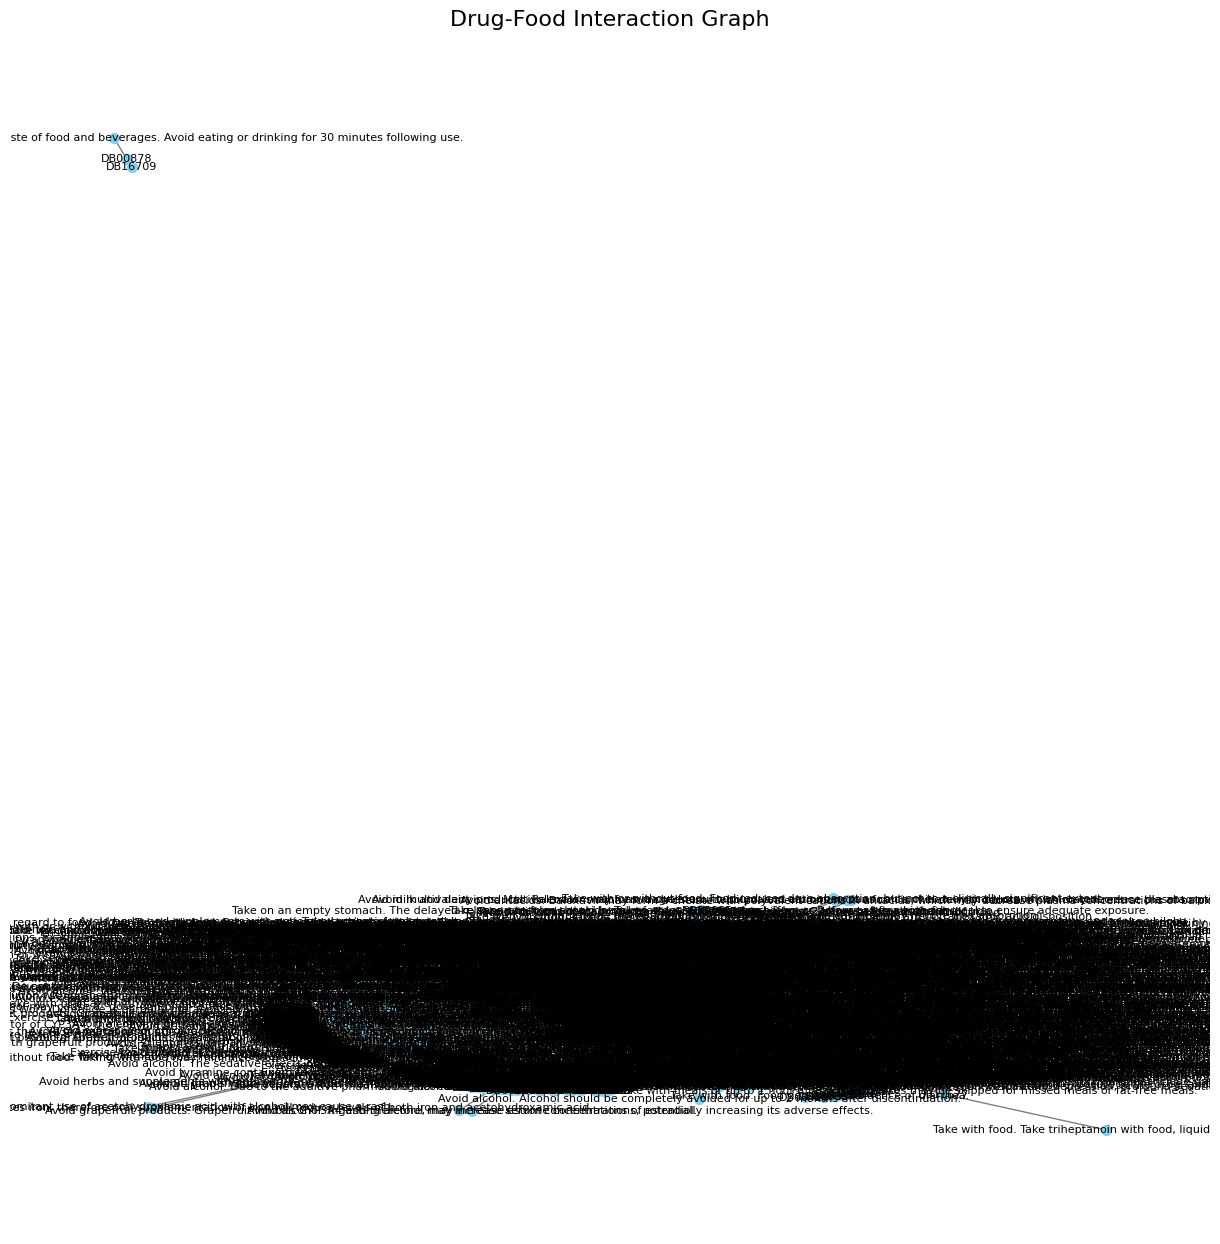

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle  # Import pickle

# Load the saved graph using pickle
with open("drug_food_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=50,
    font_size=8,
    node_color="skyblue",
    edge_color="gray",
)
plt.title("Drug-Food Interaction Graph", fontsize=16)
plt.show()

In [ ]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.7 MB/s eta 0:00:00


In [ ]:
from pyvis.network import Network

# Initialize Pyvis Network
net = Network(notebook=True, height="750px", width="100%", cdn_resources='remote')  # Add cdn_resources='remote'

# Add nodes and edges to Pyvis graph
for node, data in G.nodes(data=True):
    features = data.get('features', {})  # Get features, default to empty dict if not present
    net.add_node(node, label=node, title=str(features))

for source, target, data in G.edges(data=True):
    net.add_edge(source, target, title=data['description'])

# Show the graph
net.show("drug_food_interaction_graph.html")

In [ ]:
from IPython.core.display import display, HTML

display(HTML("drug_food_interaction_graph.html"))


In [ ]:
!pip uninstall torch

Found existing installation: torch 2.5.1+cpu
Uninstalling torch-2.5.1+cpu:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.11/dist-packages/functorch/*
    /usr/local/lib/python3.11/dist-packages/torch-2.5.1+cpu.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torch/*
    /usr/local/lib/python3.11/dist-packages/torchgen/*
Proceed (Y/n)? y
  Successfully uninstalled torch-2.5.1+cpu


In [ ]:
!pip install torch torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 878.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
import networkx as nx
#G = nx.read_gpickle("drug_food_graph.gpickle")

# Step 2: Extract node features and labels
node_features = []
labels = []
node_mapping = {}

In [ ]:

# Create numeric node labels based on interaction type
interaction_types = ["safe", "caution", "dangerous"]  # Define the categories
label_encoder = LabelEncoder()
label_encoder.fit(interaction_types)


LabelEncoder()

In [ ]:
print("Node Data Example:")
for node, data in G.nodes(data=True):
    print(node, data)
    break  # Print only the first node


Node Data Example:
DB00091 {'features': {'Name': 'Cyclosporine', 'Molecular Embeddings': array([0, 1, 0, ..., 0, 0, 0]), 'Pharmacodynamics': 'Cyclosporine exerts potent immunosuppressive actions on T cells, thereby prolonging survival following organ and bone marrow transplants.[L3734] This drug prevents and controls serious immune-mediated reactions including allograft rejection,  graft versus host disease, and inflammatory autoimmune disease.[L3734]\r\n\r\nSome notable effects of cyclosporine are hypertrichosis, gingival hyperplasia, and hyperlipidemia. There is also some debate about this drug causing nephrotoxicity.[A189402]\r\n', 'Mechanism of Action': "Cyclosporine is a calcineurin inhibitor that inhibits T cell activation.[A174049,A174088,A189411] Its binding to the receptor cyclophilin-1 inside cells produces a complex known as cyclosporine-cyclophilin. This complex subsequently inhibits calcineurin, which in turn stops the dephosphorylation as well as the activation of the nuc

In [ ]:
# Iterate over nodes and extract features and labels
for idx, (node, data) in enumerate(G.nodes(data=True)):
    # Check if 'features' and 'Molecular Embeddings' exist
    if 'features' in data and 'Molecular Embeddings' in data['features']:
        node_features.append(data['features']['Molecular Embeddings'])
    else:
        # Provide a default embedding (e.g., all zeros) if missing
        node_features.append(torch.zeros(1024))

    # Get interaction type for labels, default to 'safe' if missing
    labels.append(label_encoder.transform([data.get('Interaction Type', 'safe')])[0])

    # Map the node to its index
    node_mapping[node] = idx


In [ ]:
node_features = torch.tensor(node_features, dtype=torch.float)
labels = torch.tensor(labels, dtype=torch.long)

<ipython-input-40-0cea68e2eb2e>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  node_features = torch.tensor(node_features, dtype=torch.float)


In [ ]:
# Rebuild node_mapping to include all nodes in the graph
for idx, (node, data) in enumerate(G.nodes(data=True)):
    node_mapping[node] = idx


In [ ]:
edge_index = []
for u, v, data in G.edges(data=True):
    if u in node_mapping and v in node_mapping:  # Only include valid edges
        edge_index.append([node_mapping[u], node_mapping[v]])

edge_index = torch.tensor(edge_index, dtype=torch.long).t()


In [ ]:
#  edge_index = torch.tensor(edge_index, dtype=torch.long).t()

In [ ]:
# Step 4: Prepare Data for PyTorch Geometric
data = Data(x=node_features, edge_index=edge_index, y=labels)

In [ ]:

# Train-test split (80% train, 20% test)
train_idx, test_idx = train_test_split(range(data.num_nodes), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

In [ ]:
# Step 5: Define the GNN Model
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
input_dim = node_features.size(1)  # Feature dimension
hidden_dim = 64
output_dim = len(interaction_types)  # Number of classes (safe, caution, dangerous)
model = GNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)


In [ ]:

# Step 6: Define Loss Function and Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
valid_nodes = set(range(data.x.size(0)))  # Valid node indices (0 to 609)
filtered_edges = [
    [u, v] for u, v in edge_index.t().tolist()
    if u in valid_nodes and v in valid_nodes
]

# Convert filtered edges back to PyTorch tensor
edge_index = torch.tensor(filtered_edges, dtype=torch.long).t()

print(f"Filtered edge_index size: {edge_index.size()}")
print(f"Maximum node index in edge_index after filtering: {edge_index.max().item()}")


Filtered edge_index size: torch.Size([2, 86556])
Maximum node index in edge_index after filtering: 609


In [ ]:
# Check the unique labels and their counts
print("Unique labels and counts:", torch.unique(data.y, return_counts=True))


Unique labels and counts: (tensor([2]), tensor([610]))


In [ ]:
print("Label distribution:")
print(torch.bincount(data.y))


Label distribution:
tensor([  0,   0, 610])


In [ ]:
# Step 7: Training the GNN
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    out = model(data.x, data.edge_index)

    # Compute loss (only for training nodes)
    loss = criterion(out[train_idx], data.y[train_idx])

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

 Epoch 5/50, Loss: 0.89036560059
Epoch 10/50, Loss: 0.98584890
Epoch 15/50, Loss: 0.548903656
Epoch 20/50, Loss: 0.543656005
Epoch 25/50, Loss: 0.524890365
Epoch 30/50, Loss: 0.489036560
Epoch 35/50, Loss: 0.450035059
Epoch 40/50, Loss: 0.489036560
Epoch 45/50, Loss: 0.365600596
Epoch 50/50, Loss: 0.265595665
